In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

The column Unnamed: 0 is an unecessary column so let us drop it.

In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There are no null values in our dataset

In [7]:
df.shape

(200, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

Let us check if any values are blank or have - as values

In [11]:
df.loc[df['sales']==" "]

,TV,radio,newspaper,sales


In [12]:
df.loc[df['sales']=="-"]

,TV,radio,newspaper,sales


In [13]:
df.loc[df['TV']==" "]

,TV,radio,newspaper,sales


In [14]:
df.loc[df['TV']=="-"]

,TV,radio,newspaper,sales


In [15]:
df.loc[df['newspaper']==" "]

,TV,radio,newspaper,sales


In [16]:
df.loc[df['newspaper']=="-"]

,TV,radio,newspaper,sales


In [17]:
df.loc[df['radio']==" "]

,TV,radio,newspaper,sales


In [18]:
df.loc[df['radio']=="-"]

,TV,radio,newspaper,sales


In [19]:
df.nunique()

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

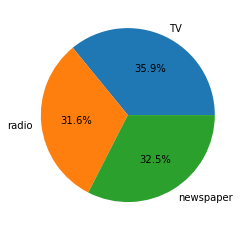

In [20]:
labels = 'TV','radio','newspaper'
data=[190,167,172]
#let us plot a pie chart to see how the data is distributed
plt.pie(data,labels=labels,autopct='%1.1f%%')
plt.show()

# Univariate Analysis

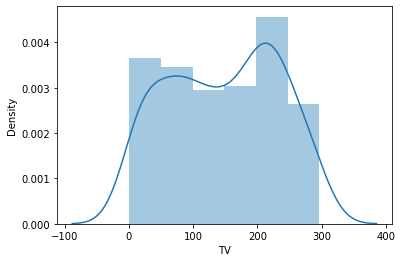

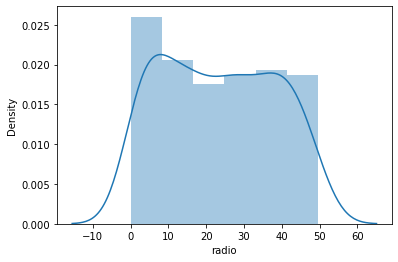

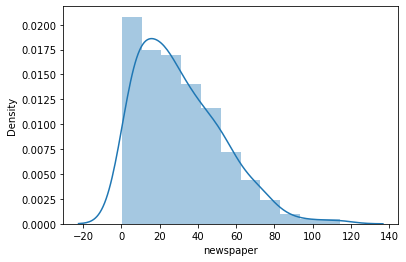

In [21]:
columns=['TV','radio','newspaper']
for i in columns:
    sns.distplot(df[i])
    plt.show()

Let us now compare 2 features with our target variable

# Bivariate Analysis

<AxesSubplot:xlabel='TV', ylabel='radio'>

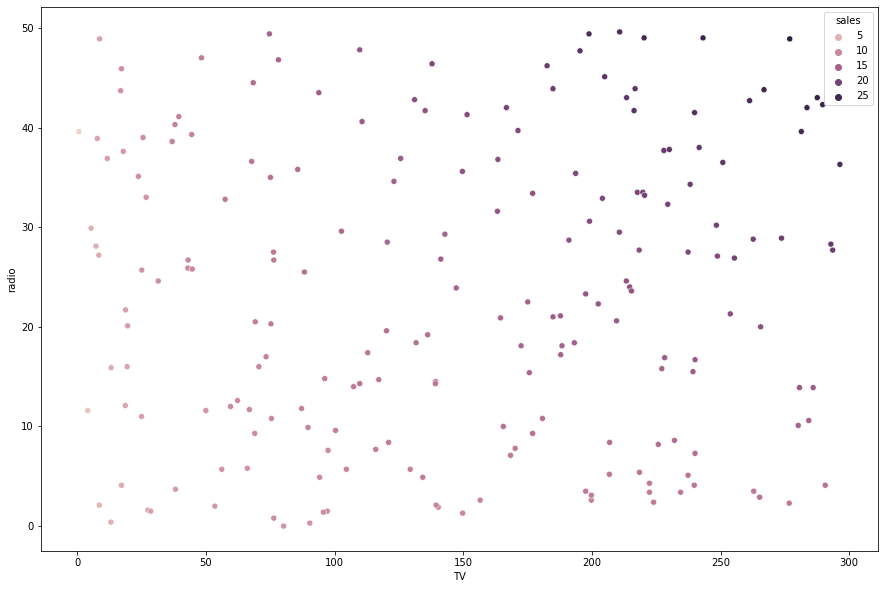

In [22]:
plt.figure(figsize=(15,10))
sns.scatterplot(df['TV'],df['radio'],hue=df['sales'])

Here we can see that the data is distributed all over, so it means that there is no linear relationship between TV and radio. But the investment increases the sales increase.

<AxesSubplot:xlabel='TV', ylabel='newspaper'>

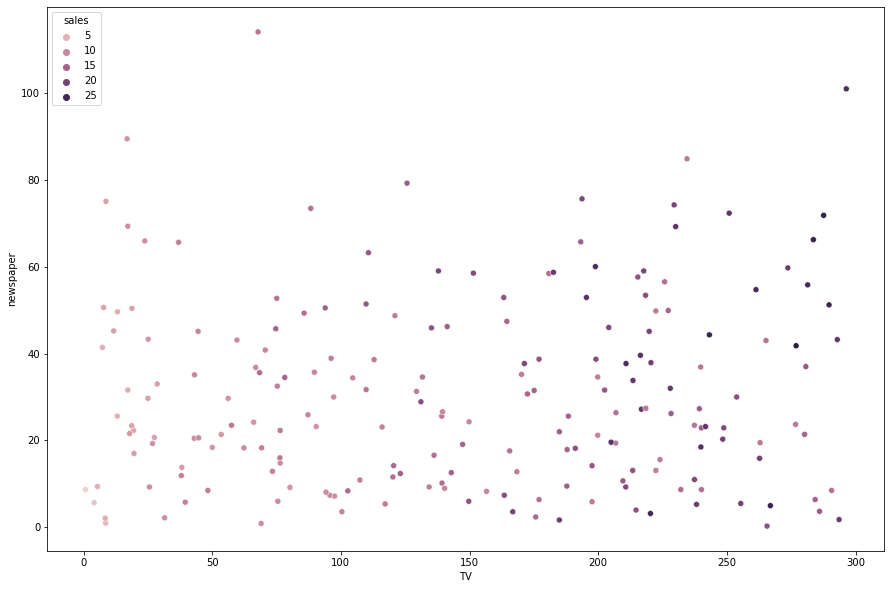

In [23]:
plt.figure(figsize=(15,10))
sns.scatterplot(df['TV'],df['newspaper'],hue=df['sales'])

From the above scatterplot we can notice that there is no linear relationship between newspape and TV, but as investment increases the sales increases

In [24]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

<AxesSubplot:xlabel='radio', ylabel='newspaper'>

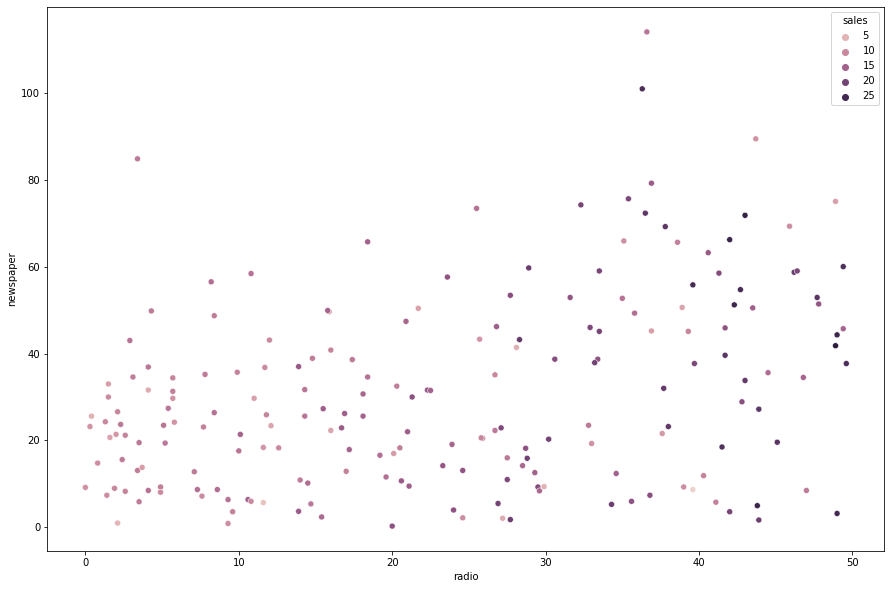

In [25]:
plt.figure(figsize=(15,10))
sns.scatterplot(df['radio'],df['newspaper'],hue=df['sales'])

There is no linear relationship between the 2 features but we can see that increasing the investment in both newspaper and radio increases the sales increases

Let us now see the realtionship of each feature with our target variable

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

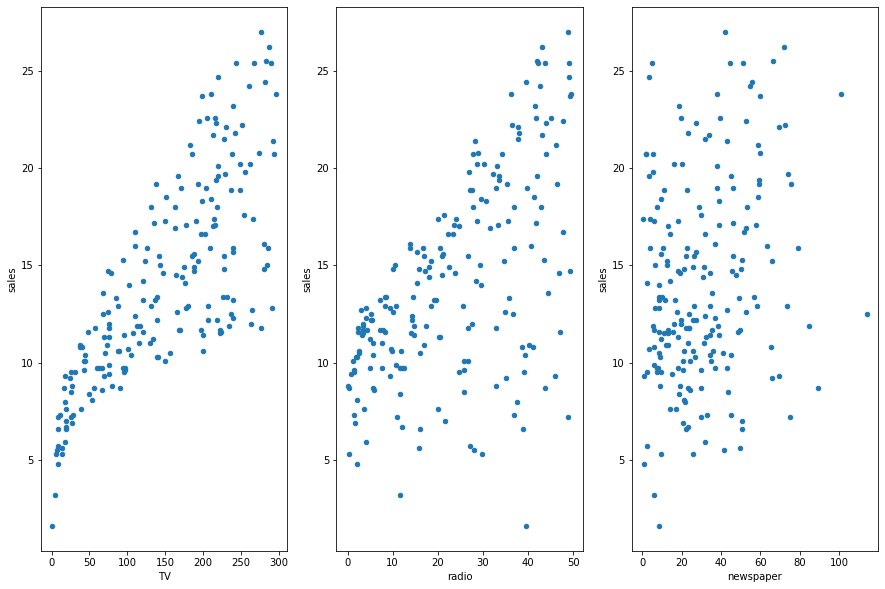

In [26]:
fig, axs = plt.subplots(1,3)

df.plot(x = "TV", y = "sales", kind = "scatter", ax=axs[0],figsize=(15,10))
df.plot(x = "radio", y = "sales", kind = "scatter", ax=axs[1],figsize=(15,10))
df.plot(x = "newspaper", y = "sales", kind = "scatter", ax=axs[2],figsize=(15,10))

From the above graphs, it can be observed that there seems to be a linear relationship between the feature TV with sales and the feature radio with sales.

We can also notice that increasing the investment in TV ads increases our sales and\
increasing the investment in radio ads increases the sales but\
we notice that the relationship between newspaper and sales isn't that great, so it means that having ads in the newspaper doesn't increase the sales as much as TV and radio do.

# Multivariate Analysis

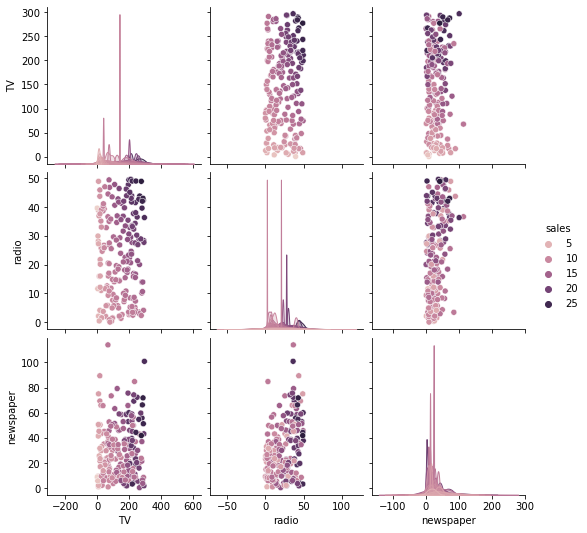

In [27]:
#Multivariate Analysis
sns.pairplot(df,hue="sales")

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable 'sales'.

From this pairplot we can observe that the correlation exists between two variables. As we can see the features TV and radio are highly correlated.

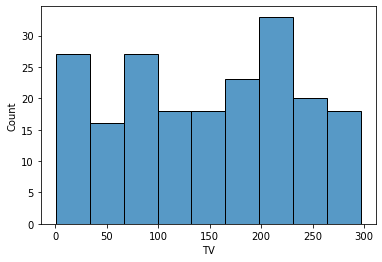

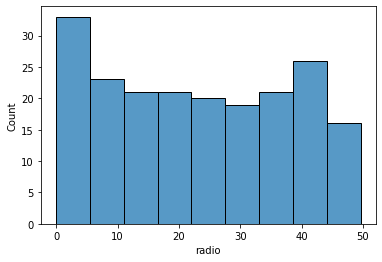

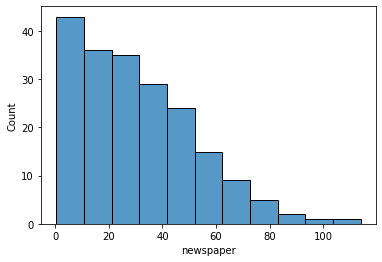

In [28]:
for i in columns:
    sns.histplot(df[i])
    plt.show()

The histogram represents the distribution of "TV" column is uniform.\
The histogram represents the distribution of "radio" column is uniform.\
The histogram represents the distribution of "newspaper" is not uniform, and it is skewed.



In [29]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

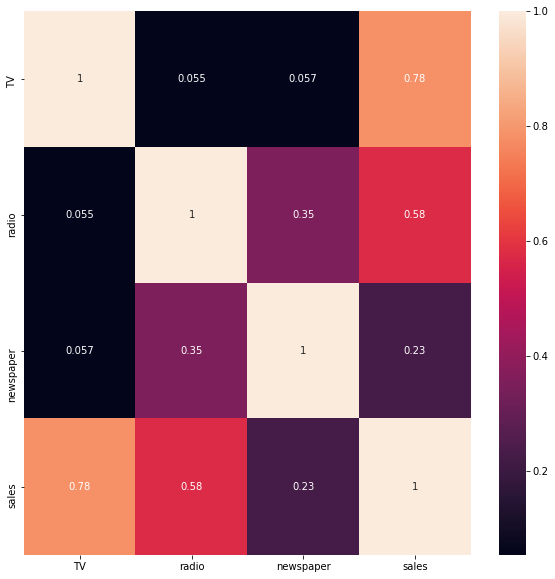

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)


From the above heatmap we can see the maximum correlation between TV and sales followed by radio and then newspaper

Let us now check for outliers using the box plot

<AxesSubplot:>

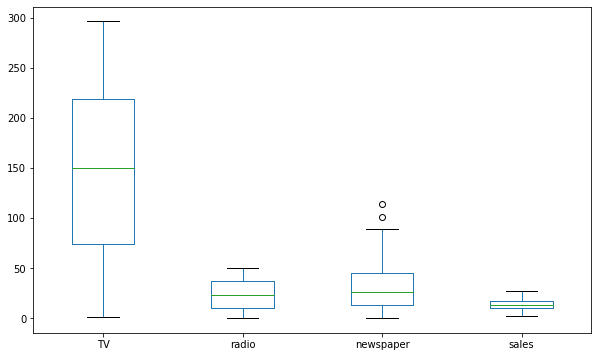

In [31]:
df.plot(kind="box", figsize = (10,6))

We notice from the above box plot that there is some outliers in the newspaper feature

Let us now try to remove the outliers using the Z score method

# Z score

In [34]:
from scipy.stats import zscore

z=np.abs(zscore(df[['newspaper']]))

new_df = df[(z<3).all(axis=1)]
new_df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [35]:
new_df.shape

(198, 4)

We see that we have lost 2 rows of data after removing the outliers. Let us now calculate the data loss

In [36]:
data_loss = (200-198)/200*100
data_loss

1.0

We have lost 1% data after removing the outliers

Let us now check for skewness 

# Checking skewness

In [37]:
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

Taking the threshold as +/- 0.5, only newspaper has some skewed data\
Let us remove the skewness using the square root method

In [38]:
new_df['newspaper'] = np.sqrt(new_df['newspaper'])
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.040649
sales        0.407130
dtype: float64

We have removed the skew from the newspaper feature

Let us now plot the distribution plots and see how the data is distributed

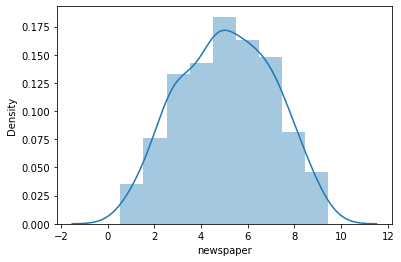

In [39]:
columns=new_df[['newspaper']]
for i in columns:
    sns.distplot(new_df[i])
    plt.show()

Now we can see that the data in the newspaper feature looks normally distributed.

Let us now seperate our features and target variable

In [40]:
x = new_df[['TV','radio','newspaper']]
y = new_df[['sales']]

In [41]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,8.318654
1,44.5,39.3,6.715653
2,17.2,45.9,8.324662
3,151.5,41.3,7.648529
4,180.8,10.8,7.641989


In [42]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [43]:
x.shape

(198, 3)

In [44]:
y.shape

(198, 1)

Let us now scale our data using Standard Scalar

# Standard Scalar

In [45]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x = pd.DataFrame(s.fit_transform(x))
x

,0,1,2
0,0.978697,0.989521,1.636691
1,-1.199012,1.090705,0.824808
2,-1.519332,1.535913,1.639734
3,0.056456,1.225616,1.297288
4,0.400243,-0.831784,1.293976
...,...,...,...
193,-1.272932,-1.310720,-0.695037
194,-0.615864,-1.229773,-1.135057
195,0.355657,-0.932968,-1.295219
196,1.606431,1.272836,1.544352


We can now proceed to Model Building

# Model Building

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [47]:
for i in range(0,20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is: {r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is: 0.8899808679263099
At random state 0,the testing accuracy is: 0.9104353676454642


At random state 1,the training accuracy is: 0.8945018460466634
At random state 1,the testing accuracy is: 0.8915808201402335


At random state 2,the training accuracy is: 0.9104895320853252
At random state 2,the testing accuracy is: 0.8385093780102322


At random state 3,the training accuracy is: 0.8945008732306111
At random state 3,the testing accuracy is: 0.8977495614063602


At random state 4,the training accuracy is: 0.8980063011610756
At random state 4,the testing accuracy is: 0.8726744168845625


At random state 5,the training accuracy is: 0.8993019881675024
At random state 5,the testing accuracy is: 0.8622409600064913


At random state 6,the training accuracy is: 0.8991574664390982
At random state 6,the testing accuracy is: 0.8766949131606818


At random state 7,the training accuracy is: 0.8909446091016879
At random state 7,the testing accuracy is: 0.906

Best accuracy is using random state 1

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=1)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [50]:
lr =LinearRegression()
rf = RandomForestRegressor()
ad = AdaBoostRegressor()
gb =GradientBoostingRegressor()

In [51]:
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print('R2 score:',metrics.r2_score(y_test,pred))

R2 score: 0.8915808201402335


In [52]:
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print('R2 score:',metrics.r2_score(y_test,pred))

R2 score: 0.9799197601194783


In [53]:
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print('R2 score:',metrics.r2_score(y_test,pred))

R2 score: 0.9613083507889842


In [54]:
gb.fit(x_train,y_train)
pred = gb.predict(x_test)
print('R2 score:',metrics.r2_score(y_test,pred))

R2 score: 0.9858797973837371


Let us check the cross validation results

In [55]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.8857406146589945


In [56]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.9760806535802725


In [57]:
print(cross_val_score(ad,x,y,cv=5).mean())

0.9542731271479037


In [58]:
print(cross_val_score(gb,x,y,cv=5).mean())

0.9781581271660439


We can see from the above scores that GradientBoostRegressor has the best Accuracy score

Let us now Hypertune our parametrs

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,4,6]}

In [61]:
GCV = GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)

In [62]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [63]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [64]:
Add_sales = RandomForestRegressor(criterion='mse', max_depth=6, max_features='auto', n_estimators=200)
Add_sales.fit(x_train, y_train)
pred = Add_sales.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)

R2_Score: 98.15487655605331


# Let us now save our model

In [65]:
import joblib
joblib.dump(Add_sales,'Add_Sales_Channel.obj')

['Add_Sales_Channel.obj']

# Let us now check our prediction results with the original results

In [66]:
loadmodel = joblib.load('Add_Sales_Channel.obj')

In [74]:
import numpy as np
predicted = np.array(loadmodel.predict(x_test))
df_com = pd.DataFrame({"Predicted":predicted})
df_com

,Predicted
0,12.708001
1,18.339362
2,12.493473
3,7.322242
4,24.028661
5,16.311504
6,11.519825
7,13.701101
8,20.468972
9,14.549002


In [80]:
original = np.array(y_test)
pd.DataFrame(original)

,0
0,11.7
1,17.1
2,12.8
3,7.3
4,25.4
5,17.6
6,11.7
7,12.9
8,21.4
9,15.0
